## 13.3 Statistical tests of assumptions

It might be anticipated that the assumptions of the linear regression model can be investigated using formal hypothesis tests. Indeed there exist a number of statistical tests for normalilty including the Kolmorogorov-Smirnov test and the Shapiro-Wilk test. Further, there exist statistical tests for heteroscedasticity of rediduals. 

However, these tests suffer from the drawback that they tend to only have statistical power to detect model violations when datasets are large and when datasets are large the central limit theorem means that the consequences of these violations of are less important than in small datasets. With large datasets, tests of normality and heteroscedasticity can often be statistically significant, but the impact of these violations may be practically unimportant. For these reasons, the tests are considered by many statisticians to be of limited practical use and so details of these procedures will not be given here.

### 13.3.1 Examples using the birthweight data

We will use some of the graphical tools discussed above to assess the validity of assumptions in the multivariable model defined in the previous chapter (Model 3). Recall Model 3 was defined as: 

$$\text{Model 3: } y_i = \beta_0 + \beta_1 l_i + \beta_2h_i + \epsilon_i $$

The outcome $y_i$ denotes the birthweight (in oz) for the $i^{th}$ baby. The covariates $l_i$ and $h_i$ denote the length of pregnancy (i.e. number of gestational days), and the height of the mother (in inches) for the $i^{th}$ baby, respectively.

The code below fits Model 3 to the birthweight data, and then produces (1) a plot of residuals against fitted values (2) a Q-Q plot of the standardised residuals and (3) a plot of Cook's distances by observation. 

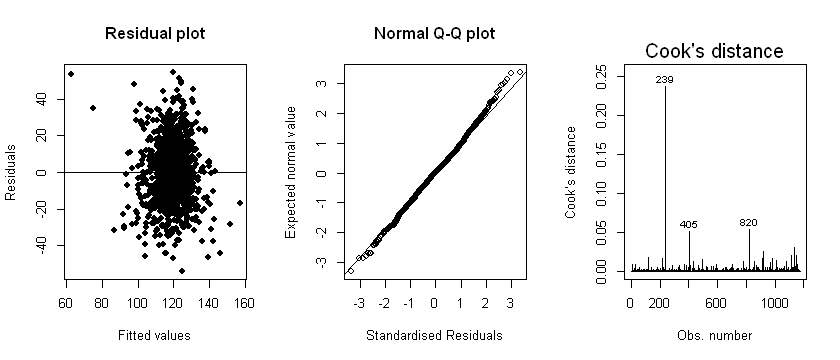

In [2]:
#Load the data
data<- read.csv('https://www.inferentialthinking.com/data/baby.csv')

#Fit Model 3 to the data
model3<-lm(Birth.Weight~Gestational.Days+Maternal.Height, data=data)

#Set the graphical space so that two plots are shown side-by-side in one row
par(mfrow=c(1,3))
options(repr.plot.height=3)

#Plot the residuals against the fitted values
plot(model3$fitted.values, model3$residuals, main = "Residual plot", xlab="Fitted values", ylab="Residuals", pch=19)
abline(h=0)

#Obtain the standardised residuals
Standardised.Residuals<-rstandard(model3)

#Normal Q-Q plot of the standardised residuals 
qqnorm(Standardised.Residuals, main="Normal Q-Q plot", ylab="Expected normal value", xlab="Standardised Residuals")
qqline(Standardised.Residuals)

#Plot of Cook's distance
plot(model3, which=4)

#### We make the following observations: 

1. **Linearity:** The residuals are equally distributed above and below zero in the "Residual plot"

2. **Normality:** There do not appear to be any serious departures from normality, based on the "Normal Q-Q plot" 

3. **Homoscedasticity:** The variance of residuals are constant across the fitted values (based on the "Residual plot")

However, the Cook's distance plot reveals that observation 239 is highly influential, compared to the remaining observations. Observations 405 and 820 also have a relatively high Cook's distance. Sensitivity analyses may be required to assess model fit with and without these observations (this is discussed in Section 3.5.3). 

Finally, we can assume that the independence assumption holds, since the birthweight of a baby from one mother is not expected to be associated with the birthweight of a baby from a different mother. Therefore, we can reasonably conclude that all the assumptions are met in this model (but there are some potentially problematic observations in terms of influence).  

In the next section, we briefly introduce some of the statisical solutions available for when assumptions are not met. 
